# Test Cell Library

This is a port of `testCellLibrary.cpp` to Python.
It tests both the functionality of CellParams, the scaling routines, and the cell databases including interpolation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CLICopti

CLICopti version 2.0
Copyright (C) 2014- 
 Kyrre Ness Sjobak <k.n.sjobak@fys.uio.no> (CERN and University of Oslo),
 Daniel Schulte (CERN),
 Alexej Grudiev (CERN),
 Andrea Latina (CERN),
 Jim Ögren (Uppsala University and CERN)

We have invested a lot of time and effort in creating and maintaining the CLICopti library,
 please cite it when using it. See the CITATION file in the source distribution
 (e.g. on https://gitlab.cern.ch/clic-software/clicopti ) for more information.



## CellBase_linearInterpolation

In [2]:
base = CLICopti.CellBase.CellBase_linearInterpolation(CLICopti.CellBase.celldatabase_TD_30GHz, ("psi", "a_n", "d_n"))
base.printGrid()

[ 0 0 0 ] -> 0
120 0.07 0.1 
h=0.00333269[m], a=0.000699866[m], d_n=0.1, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=4041, vg=0.32[%c], rQ=50345[linacOhm/m], Es=1.8, Hs=3.6[mA/V], Sc=nan[mA/V], f1mn=45.32[GHz], Q1mn=6.7, A1mn=3044.33[V/pC/m/mm]

[ 0 0 1 ] -> 1
120 0.07 0.25 
h=0.00333269[m], a=0.000699866[m], d_n=0.25, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=3718, vg=0.12[%c], rQ=45470[linacOhm/m], Es=1.7, Hs=4.1[mA/V], Sc=nan[mA/V], f1mn=44.77[GHz], Q1mn=7.8, A1mn=3101.55[V/pC/m/mm]

[ 0 0 2 ] -> 2
120 0.07 0.4 
h=0.00333269[m], a=0.000699866[m], d_n=0.4, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=3292, vg=0.055[%c], rQ=38209[linacOhm/m], Es=1.8, Hs=4.9[mA/V], Sc=nan[mA/V], f1mn=43.74[GHz], Q1mn=9, A1mn=2880.35[V/pC/m/mm]

[ 0 1 0 ] -> 3
120 0.11 0.1 
h=0.00333269[m], a=0.00109979[m], d_n=0.1, a_n=0.11, f0=29.985[GHz], psi=120[deg], Q=4081, vg=1.59[%c], rQ=41848[linacOhm/m], Es=2.2, Hs=3.8[mA/V], Sc=nan[mA/V], f1mn=42.97[GHz], Q1mn=8.3, A1mn=2652.27[V/pC/m/mm]

[ 0 1 1 ] -> 4
120 0.11 

### Testing Cell Arithmetic

In [3]:
c000 = base.getCellGrid([0,0,0])
print("c000 :",c000)

c000 : h=0.00333269[m], a=0.000699866[m], d_n=0.1, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=4041, vg=0.32[%c], rQ=50345[linacOhm/m], Es=1.8, Hs=3.6[mA/V], Sc=nan[mA/V], f1mn=45.32[GHz], Q1mn=6.7, A1mn=3044.33[V/pC/m/mm]


In [4]:
c001 = base.getCellGrid((0,0,1))
print("c001 :",c001)

c001 : h=0.00333269[m], a=0.000699866[m], d_n=0.25, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=3718, vg=0.12[%c], rQ=45470[linacOhm/m], Es=1.7, Hs=4.1[mA/V], Sc=nan[mA/V], f1mn=44.77[GHz], Q1mn=7.8, A1mn=3101.55[V/pC/m/mm]


In [5]:
print("c001*2.0 :",c001*2.0)
print("2*c001   :",2*c001)

c001*2.0 : h=0.00666539[m], a=0.00139973[m], d_n=0.5, a_n=0.14, f0=59.97[GHz], psi=240[deg], Q=7436, vg=0.24[%c], rQ=90940[linacOhm/m], Es=3.4, Hs=8.2[mA/V], Sc=nan[mA/V], f1mn=89.54[GHz], Q1mn=15.6, A1mn=6203.11[V/pC/m/mm]
2*c001   : h=0.00666539[m], a=0.00139973[m], d_n=0.5, a_n=0.14, f0=59.97[GHz], psi=240[deg], Q=7436, vg=0.24[%c], rQ=90940[linacOhm/m], Es=3.4, Hs=8.2[mA/V], Sc=nan[mA/V], f1mn=89.54[GHz], Q1mn=15.6, A1mn=6203.11[V/pC/m/mm]


In [6]:
print("c001/2 :",c001/2)

c001/2 : h=0.00166635[m], a=0.000349933[m], d_n=0.125, a_n=0.035, f0=14.9925[GHz], psi=60[deg], Q=1859, vg=0.06[%c], rQ=22735[linacOhm/m], Es=0.85, Hs=2.05[mA/V], Sc=nan[mA/V], f1mn=22.385[GHz], Q1mn=3.9, A1mn=1550.78[V/pC/m/mm]


In [7]:
print("c000+c001 :",c000+c001)
print("c000-c001 :",c000-c001)

c000+c001 : h=0.00666539[m], a=0.00139973[m], d_n=0.35, a_n=0.14, f0=59.97[GHz], psi=240[deg], Q=7759, vg=0.44[%c], rQ=95815[linacOhm/m], Es=3.5, Hs=7.7[mA/V], Sc=nan[mA/V], f1mn=90.09[GHz], Q1mn=14.5, A1mn=6145.88[V/pC/m/mm]
c000-c001 : h=0[m], a=0[m], d_n=-0.15, a_n=0, f0=0[GHz], psi=0[deg], Q=323, vg=0.2[%c], rQ=4875[linacOhm/m], Es=0.1, Hs=-0.5[mA/V], Sc=nan[mA/V], f1mn=0.55[GHz], Q1mn=-1.1, A1mn=-57.2283[V/pC/m/mm]


In [8]:
print("(c000+c001)*0.5 :",(c000+c001)*0.5)
print("(c000+c001)/2   :",(c000+c001)/2)

(c000+c001)*0.5 : h=0.00333269[m], a=0.000699866[m], d_n=0.175, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=3879.5, vg=0.22[%c], rQ=47907.5[linacOhm/m], Es=1.75, Hs=3.85[mA/V], Sc=nan[mA/V], f1mn=45.045[GHz], Q1mn=7.25, A1mn=3072.94[V/pC/m/mm]
(c000+c001)/2   : h=0.00333269[m], a=0.000699866[m], d_n=0.175, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=3879.5, vg=0.22[%c], rQ=47907.5[linacOhm/m], Es=1.75, Hs=3.85[mA/V], Sc=nan[mA/V], f1mn=45.045[GHz], Q1mn=7.25, A1mn=3072.94[V/pC/m/mm]


### Test that the interpolation works as expected
This should output the same cells twice - once directly from grid, and once from interpolation

In [9]:
for Ipsi in range(2):
    for Ian in range(5):
        for Idn in range(3):
            Idex = (Ipsi, Ian, Idn)
            print("Grid idx =", Idex)

            t = base.getCellGrid(Idex)
            print("Cell at grid:", t)

            dIdx = [t.psi,t.a_n,t.d_n]
            print("Coordinates:", dIdx)

            t2 = base.getCellInterpolated(dIdx)
            print ("Cell at coords:", t2)

            print()



Grid idx = (0, 0, 0)
Cell at grid: h=0.00333269[m], a=0.000699866[m], d_n=0.1, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=4041, vg=0.32[%c], rQ=50345[linacOhm/m], Es=1.8, Hs=3.6[mA/V], Sc=nan[mA/V], f1mn=45.32[GHz], Q1mn=6.7, A1mn=3044.33[V/pC/m/mm]
Coordinates: [120.0, 0.07, 0.1]
Cell at coords: h=0.00333269[m], a=0.000699866[m], d_n=0.1, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=4041, vg=0.32[%c], rQ=50345[linacOhm/m], Es=1.8, Hs=3.6[mA/V], Sc=nan[mA/V], f1mn=45.32[GHz], Q1mn=6.7, A1mn=3044.33[V/pC/m/mm]

Grid idx = (0, 0, 1)
Cell at grid: h=0.00333269[m], a=0.000699866[m], d_n=0.25, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=3718, vg=0.12[%c], rQ=45470[linacOhm/m], Es=1.7, Hs=4.1[mA/V], Sc=nan[mA/V], f1mn=44.77[GHz], Q1mn=7.8, A1mn=3101.55[V/pC/m/mm]
Coordinates: [120.0, 0.07, 0.25]
Cell at coords: h=0.00333269[m], a=0.000699866[m], d_n=0.25, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=3718, vg=0.12[%c], rQ=45470[linacOhm/m], Es=1.7, Hs=4.1[mA/V], Sc=nan[mA/V], f1mn=44.77[GHz], Q1mn=7.8

## Testing CellBase_linearInterpolation_freqScaling

In [10]:
f0_2 = 11.9942 #[GHz]
base2 = CLICopti.CellBase.CellBase_linearInterpolation_freqScaling(CLICopti.CellBase.celldatabase_TD_30GHz, ("psi", "a_n", "d_n"), f0_2)

In [11]:
#import CLICopti.CellParams

#Get the grid point directly
b000 = base2.getCellGrid((0,0,0))
print("b000 grid         :", b000)

base2.scaleCell(b000)
print("scaled explicitly :", b000)

#Directly call the scaler function
b000_sf = CLICopti.CellParams.scaleCell(b000,f0_2)
print("scaled directly   :", b000_sf)

#Get the 
dIdex = [b000.psi, b000.a_n, b000.d_n]
a000 = base2.getCellInterpolated(dIdex)
print("Interpolated and internally scaled :")
print("                   ",a000)


b000 grid         : h=0.00333269[m], a=0.000699866[m], d_n=0.1, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=4041, vg=0.32[%c], rQ=50345[linacOhm/m], Es=1.8, Hs=3.6[mA/V], Sc=nan[mA/V], f1mn=45.32[GHz], Q1mn=6.7, A1mn=3044.33[V/pC/m/mm]
scaled explicitly : h=0.0083316[m], a=0.00174963[m], d_n=0.1, a_n=0.07, f0=11.9942[GHz], psi=120[deg], Q=6389.33, vg=0.32[%c], rQ=20138.3[linacOhm/m], Es=1.8, Hs=3.6[mA/V], Sc=nan[mA/V], f1mn=18.1283[GHz], Q1mn=6.7, A1mn=194.847[V/pC/m/mm]
scaled directly   : h=0.0083316[m], a=0.00174963[m], d_n=0.1, a_n=0.07, f0=11.9942[GHz], psi=120[deg], Q=6389.33, vg=0.32[%c], rQ=20138.3[linacOhm/m], Es=1.8, Hs=3.6[mA/V], Sc=nan[mA/V], f1mn=18.1283[GHz], Q1mn=6.7, A1mn=194.847[V/pC/m/mm]
Interpolated and internally scaled :
                    h=0.0083316[m], a=0.00174963[m], d_n=0.1, a_n=0.07, f0=11.9942[GHz], psi=120[deg], Q=6389.33, vg=0.32[%c], rQ=20138.3[linacOhm/m], Es=1.8, Hs=3.6[mA/V], Sc=nan[mA/V], f1mn=18.1283[GHz], Q1mn=6.7, A1mn=194.847[V/pC/m/mm]


## Explicity copying of the cellParams object:


In [12]:
print("Original f0 in in orignal object       :", b000.f0)
b0 = CLICopti.CellParams.CellParams_copy(b000)
b0.f0 = 0
print("f0 in copy after zeroing it            :",b0.f0)
print("f0 in orignal after zeroing f0 in copy :", b000.f0)


Original f0 in in orignal object       : 11.9942
f0 in copy after zeroing it            : 0.0
f0 in orignal after zeroing f0 in copy : 11.9942


## Testing CellBase_compat

In [13]:
#import CLICopti.CellBase
base3 = CLICopti.CellBase.CellBase_compat(CLICopti.CellBase.celldatabase_TD_30GHz, f0_2)
base3.printGrid()

[ 0 0 0 ] -> 0
120 0.07 0.1 
h=0.00333269[m], a=0.000699866[m], d_n=0.1, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=4041, vg=0.32[%c], rQ=50345[linacOhm/m], Es=1.8, Hs=3.6[mA/V], Sc=nan[mA/V], f1mn=45.32[GHz], Q1mn=6.7, A1mn=3044.33[V/pC/m/mm]

[ 0 0 1 ] -> 1
120 0.07 0.25 
h=0.00333269[m], a=0.000699866[m], d_n=0.25, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=3718, vg=0.12[%c], rQ=45470[linacOhm/m], Es=1.7, Hs=4.1[mA/V], Sc=nan[mA/V], f1mn=44.77[GHz], Q1mn=7.8, A1mn=3101.55[V/pC/m/mm]

[ 0 0 2 ] -> 2
120 0.07 0.4 
h=0.00333269[m], a=0.000699866[m], d_n=0.4, a_n=0.07, f0=29.985[GHz], psi=120[deg], Q=3292, vg=0.055[%c], rQ=38209[linacOhm/m], Es=1.8, Hs=4.9[mA/V], Sc=nan[mA/V], f1mn=43.74[GHz], Q1mn=9, A1mn=2880.35[V/pC/m/mm]

[ 0 1 0 ] -> 3
120 0.11 0.1 
h=0.00333269[m], a=0.00109979[m], d_n=0.1, a_n=0.11, f0=29.985[GHz], psi=120[deg], Q=4081, vg=1.59[%c], rQ=41848[linacOhm/m], Es=2.2, Hs=3.8[mA/V], Sc=nan[mA/V], f1mn=42.97[GHz], Q1mn=8.3, A1mn=2652.27[V/pC/m/mm]

[ 0 1 1 ] -> 4
120 0.11 

In [14]:
psi_list=[120,150,130]
for psi in psi_list:
    print("Testing at psi =",psi)
    for a_n in np.linspace(0.07,0.23,23-7+1):
        for d_n in np.linspace(0.1,0.4,4-1+1):
            dIdex = (psi,a_n,d_n)
            print(dIdex, '\n\t', base3.getCellInterpolated(dIdex))
    print()

Testing at psi = 120
(120, 0.07, 0.1) 
	 h=0.0083316[m], a=0.00174963[m], d_n=0.1, a_n=0.07, f0=11.9942[GHz], psi=120[deg], Q=6389.33, vg=0.32[%c], rQ=20138.3[linacOhm/m], Es=1.8, Hs=3.6[mA/V], Sc=nan[mA/V], f1mn=18.1283[GHz], Q1mn=6.7, A1mn=194.847[V/pC/m/mm]
(120, 0.07, 0.2) 
	 h=0.0083316[m], a=0.00174963[m], d_n=0.2, a_n=0.07, f0=11.9942[GHz], psi=120[deg], Q=6066.95, vg=0.171667[%c], rQ=18944.4[linacOhm/m], Es=1.71111, Hs=3.9[mA/V], Sc=nan[mA/V], f1mn=18.003[GHz], Q1mn=7.42222, A1mn=199.269[V/pC/m/mm]
(120, 0.07, 0.30000000000000004) 
	 h=0.0083316[m], a=0.00174963[m], d_n=0.3, a_n=0.07, f0=11.9942[GHz], psi=120[deg], Q=5672.2, vg=0.0833333[%c], rQ=17326.2[linacOhm/m], Es=1.71111, Hs=4.33333[mA/V], Sc=nan[mA/V], f1mn=17.7923[GHz], Q1mn=8.18889, A1mn=195.77[V/pC/m/mm]
(120, 0.07, 0.4) 
	 h=0.0083316[m], a=0.00174963[m], d_n=0.4, a_n=0.07, f0=11.9942[GHz], psi=120[deg], Q=5205.07, vg=0.055[%c], rQ=15283.9[linacOhm/m], Es=1.8, Hs=4.9[mA/V], Sc=nan[mA/V], f1mn=17.4963[GHz], Q1mn=9, A1

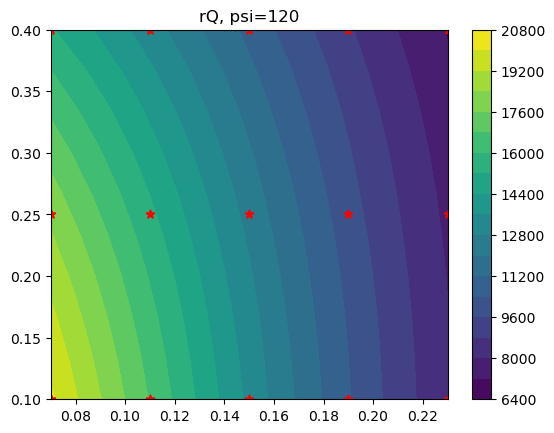

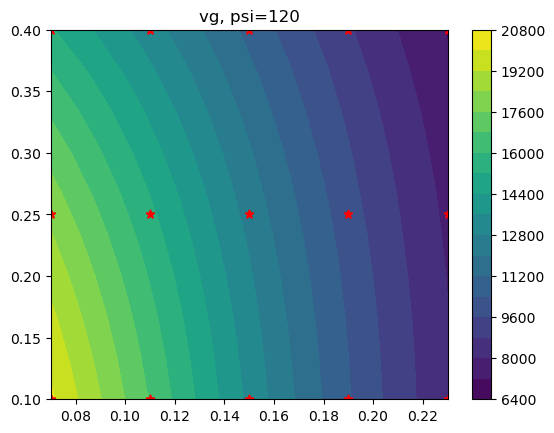

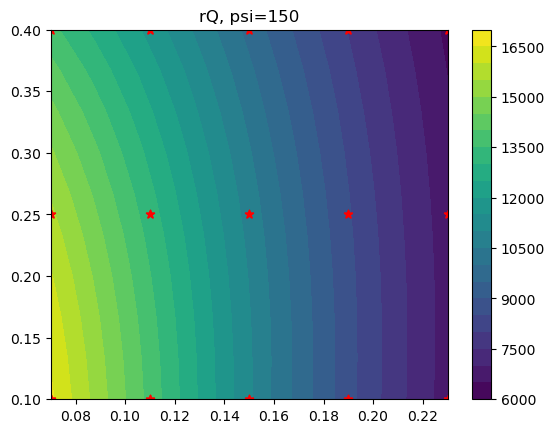

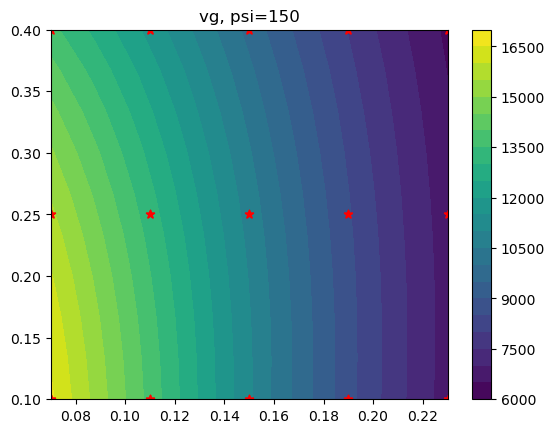

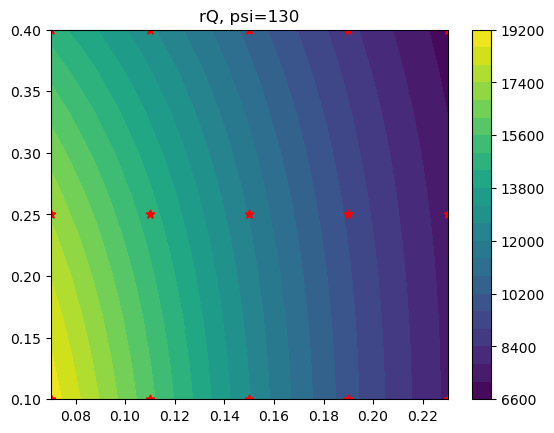

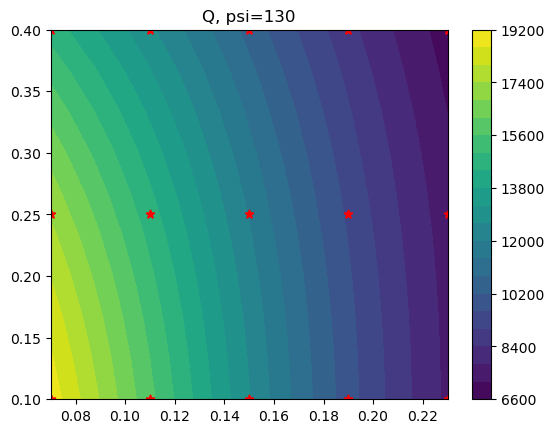

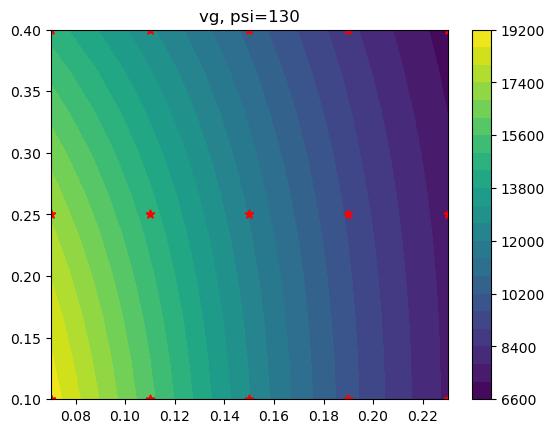

In [15]:
#Make plots
def _contourPlot(data,title):
    plt.figure()
    plt.contourf(a_n,d_n,rQ,20)
    plt.colorbar()
    plt.title(title)

    mg,_ = base3.getGrid_meshgrid()
    plt.scatter(mg[1],mg[2], marker='*', color='red')

for psi in psi_list:
    a_n,d_n = np.meshgrid(np.linspace(0.07,0.23,10), np.linspace(0.1,0.4,10))
    rQ = np.zeros_like(a_n)
    Q  = np.zeros_like(a_n)
    vg = np.zeros_like(a_n)

    for a_n_i_, a_n_ in enumerate(a_n[0,:]):
        for d_n_i_, d_n_ in enumerate(d_n[:,0]):
            cell3 = base3.getCellInterpolated([psi,a_n_,d_n_])
            #cell3 = base3.getCellInterpolated([psi,a_n_,d_n_])
            rQ[d_n_i_,a_n_i_] = cell3.rQ
            Q [d_n_i_,a_n_i_] = cell3.Q
            vg[d_n_i_,a_n_i_] = cell3.vg

    _contourPlot(rQ,f'rQ, psi={psi}')
    _contourPlot( Q, f'Q, psi={psi}')
    _contourPlot(vg,f'vg, psi={psi}')


## Comparison of interpolation methods

$\psi = 120$, looping from $(a_n, d_n) = (0.07,0.1)$ via $(0.11,0.25)$ to $(0.15,0.4)$:

In [16]:
#Reference cells
refCell1 = base3.getCellGrid((0,0,0))
base3.scaleCell(refCell1)
print("First  ref cell:", refCell1)

refCell2 = base3.getCellGrid((0,2,1))
base3.scaleCell(refCell2)
print("Middle ref cell:", refCell2)

refCell3 = base3.getCellGrid((0,4,2))
base3.scaleCell(refCell3)
print("Last   ref cell:", refCell3)

First  ref cell: h=0.0083316[m], a=0.00174963[m], d_n=0.1, a_n=0.07, f0=11.9942[GHz], psi=120[deg], Q=6389.33, vg=0.32[%c], rQ=20138.3[linacOhm/m], Es=1.8, Hs=3.6[mA/V], Sc=nan[mA/V], f1mn=18.1283[GHz], Q1mn=6.7, A1mn=194.847[V/pC/m/mm]
Middle ref cell: h=0.0083316[m], a=0.00374922[m], d_n=0.25, a_n=0.15, f0=11.9942[GHz], psi=120[deg], Q=6046.22, vg=2.62[%c], rQ=12513.4[linacOhm/m], Es=2, Hs=4.6[mA/V], Sc=nan[mA/V], f1mn=15.9483[GHz], Q1mn=17.8, A1mn=110.459[V/pC/m/mm]
Last   ref cell: h=0.0083316[m], a=0.0057488[m], d_n=0.4, a_n=0.23, f0=11.9942[GHz], psi=120[deg], Q=5644.62, vg=7.49[%c], rQ=7145.32[linacOhm/m], Es=2.2, Hs=6[mA/V], Sc=nan[mA/V], f1mn=14.4882[GHz], Q1mn=209, A1mn=39.1912[V/pC/m/mm]


Text(0, 0.5, '$v_g$')

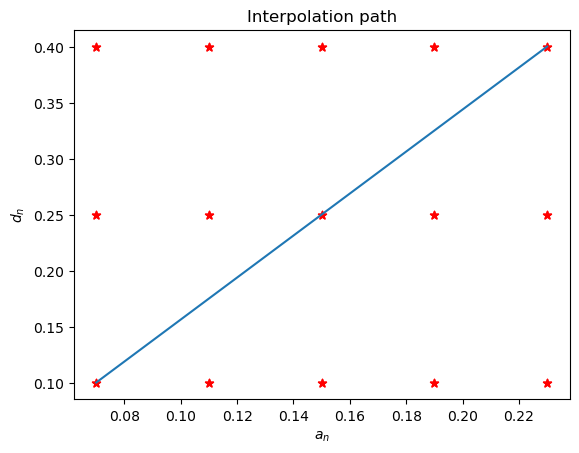

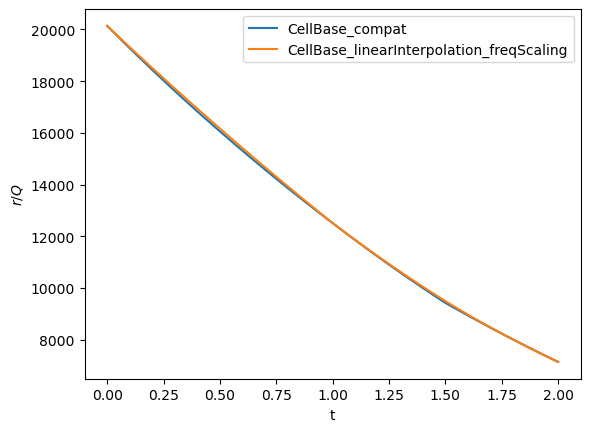

In [17]:
T = np.linspace(0,2,200)

an = []
dn = []

rQ2 = []
rQ3 = []

Q2 = []
Q3 = []

vg2 = []
vg3 = []

for t in T:
    psi = 120
    a_n = t*(0.11-0.07)*2 + 0.07
    d_n = t*(0.25-0.1) + 0.1
    dIdex=(psi,a_n,d_n)

    an.append(a_n)
    dn.append(d_n)
    
    tCell2 = base2.getCellInterpolated(dIdex)
    tCell3 = base3.getCellInterpolated(dIdex)
    
    rQ2.append(tCell2.rQ)
    rQ3.append(tCell3.rQ)

    Q2.append(tCell2.Q)
    Q3.append(tCell3.Q)

    vg2.append(tCell2.vg)
    vg3.append(tCell3.vg)

plt.figure()
plt.plot(an,dn)
mg,_ = base3.getGrid_meshgrid()
plt.scatter(mg[1],mg[2], marker='*', color='red')
plt.title('Interpolation path')
plt.xlabel(r'$a_n$')
plt.ylabel(r'$d_n$')

plt.figure()
plt.plot(T,rQ2,label='CellBase_compat')
plt.plot(T,rQ3,label='CellBase_linearInterpolation_freqScaling')
plt.legend()
plt.xlabel('t')
plt.ylabel('$r/Q$')

plt.figure()
plt.plot(T,Q2,label='CellBase_compat')
plt.plot(T,Q3,label='CellBase_linearInterpolation_freqScaling')
plt.legend()
plt.xlabel('t')
plt.ylabel('$Q$')

plt.figure()
plt.plot(T,Q2,label='CellBase_compat')
plt.plot(T,Q3,label='CellBase_linearInterpolation_freqScaling')
plt.legend()
plt.xlabel('t')
plt.ylabel(r'$v_g$')

